In [10]:
import sys,os,pickle,copy
sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
import numpy as np
import numpy
import pandas as pd
import scipy
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
from importlib import reload
import seaborn as sns

import preprocess as prep

from sklearn.decomposition import NMF

import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
import matplotlib.pyplot as plt
%matplotlib inline

import nmf_analysis as na
import nmf_plot as nmfp
reload(na)
import data_prep_pyn as dpp

import pynapple as nap
from sklearn.cluster import KMeans


In [2]:
# db = pd.read_csv('/mnt/home/szheng/ceph/ad/database.csv',index_col=0)
db = pd.read_csv('/mnt/home/szheng/ceph/ad/database.csv')

In [3]:
db.query('owner=="roman"')['animal_name'].unique()

array(['e13_16f1', 'e13_26m1', 'e14_2m2', 'e14_2m3', 'e15_10m1',
       'e15_13f1', 'e15_9f1', 'e16_1f1', 'e16_2m1', 'e16_3m1', 'e16_3m2'],
      dtype=object)

In [570]:
db.query('owner=="roman"').sort_values('n_neurons',ascending=False).head(20)

,animal_name,Unnamed: 1,data_dir_full,sess_name,animal_name.1,date,behavior,performance,ntrials,ngoodtrials,n_neurons,n_pyr_putative,owner,data_root
142,e15_13f1,0,/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...,e15_13f1_220117,e15_13f1,2022-01-17,alternation,0.617647,34,34,376,333,roman,roman_data
143,e15_13f1,1,/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...,e15_13f1_220118,e15_13f1,2022-01-18,['alternation' 'linearMaze'],NaN,27,27,363,318,roman,roman_data
144,e15_13f1,2,/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...,e15_13f1_220119,e15_13f1,2022-01-19,['alternation' 'alternation'],NaN,61,61,343,288,roman,roman_data
145,e15_13f1,3,/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...,e15_13f1_220120,e15_13f1,2022-01-20,['alternation' 'linearMaze'],NaN,45,45,303,248,roman,roman_data
119,e13_26m1,0,/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...,e13_26m1_211019,e13_26m1,2021-10-19,['alternation' 'alternation'],NaN,78,78,271,228,roman,roman_data
117,e13_16f1,7,/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...,e13_16f1_210328,e13_16f1,2021-03-28,alternation,0.850000,20,20,211,174,roman,roman_data
120,e13_26m1,1,/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...,e13_26m1_211116,e13_26m1,2021-11-16,['alternation' 'linearMaze'],NaN,20,20,209,173,roman,roman_data
175,e16_3m2,3,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...,e16_3m2_211213,e16_3m2,2021-12-13,['alternation' 'alternation'],NaN,54,54,207,163,roman,roman_data
168,e16_3m1,0,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...,e16_3m1_210111,e16_3m1,2021-01-11,alternation,0.882353,17,17,203,162,roman,roman_data
174,e16_3m2,2,/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...,e16_3m2_211212,e16_3m2,2021-12-12,['alternation' 'linearMaze'],NaN,28,28,200,162,roman,roman_data


In [4]:
sess_name="e15_13f1_220117"#'e13_26m1_210913'#
data_dir_full = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117"#'/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913' #

ii=0
row = db.query('(owner=="roman")&(animal_name=="e15_13f1")').iloc[ii]
sess_name = row.sess_name
print(sess_name)
print(row.n_pyr_putative)
print(row.ngoodtrials)
data_dir_full = row.data_dir_full


py_data_dir = os.path.join(data_dir_full,"py_data")
fr_ = pickle.load(open(os.path.join(py_data_dir,'fr.p'),'rb'))
pos_bins = fr_['pos_bins']['lin']
bin_to_lin=numpy.concatenate([pos_bins[:-1,None],pos_bins[1:,None]],axis=1).mean(axis=1)

fr_df=  fr_['df']
fr_pyr = fr_['df']['pyr']
fr_int = fr_['df']['int']
fr_map_trial = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map_trial']
fr_map_avg=pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))['fr_map']
cell_cols = fr_['cell_cols']
cell_cols_pyr=np.array(cell_cols['pyr'],dtype=object)
cell_cols_int =np.array(cell_cols['int'],dtype=object)


e15_13f1_220117
333
34


In [77]:
reload(prep)
reload(dpn)

<module 'data_prep_new' from '/mnt/home/szheng/projects/util_code/data_prep_new.py'>

In [738]:

ii=1
row = db.query('(owner=="roman")&(animal_name=="e16_3m2")').iloc[ii]
sess_name = row.sess_name
print(sess_name)
print(row.n_pyr_putative)
print(row.ngoodtrials)
data_dir_full = row.data_dir_full




e16_3m2_211211
161
31


In [41]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ32/_'
data_dir_full = db.query('sess_name=="e15_13f1_220119"')['data_dir_full'].iloc[0]

In [42]:
# load the relevant structs
reload(prep)
data_dir_full = data_dir_full
to_return=prep.load_stuff(data_dir_full,sessionPulses='*SessionPulses.Events.mat')

cell_metrics=to_return['cell_metrics']
behavior=to_return['behavior']
ripple_events=to_return['ripple_events']
mergepoints=to_return['mergepoints']
cell_type_mask=to_return['cell_type_mask']
pyr_uid=to_return['pyr_uid']
try:
    session_pulses = to_return['sessionPulses']
except:
    pass

trial_ind_d = {ch:np.nonzero(behavior.trials.visitedArm==ch)[0] for ch in [0,1]}
dt = np.diff(behavior.timestamps).mean()

load *SessionPulses.Events.mat failed


In [109]:
# load spk_beh_df and fr_map
reload(dpp)

# prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=True,extra_load=dict(sessionPulses='*SessionPulses.Events.mat'))
prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=True,extra_load={})
maps = dpp.load_fr_map(data_dir_full,force_reload=True,speed_thresh=2.)


/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/spk_beh_df.p saved!
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
cant format into a dataframe
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/fr_map.p saved!


In [110]:
spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']

fr_pyr = spk_beh_df.loc[:,list(cell_cols_d['pyr'])+list(beh_df.columns)]

In [111]:
reload(na)
# nmf directly
nbins = 10

# convert to rate:
fr_pyr.loc[:,cell_cols_d['pyr']] = fr_pyr.loc[:,cell_cols_d['pyr']]/dt
speed_thresh = 1.

fr_filtered = copy.copy(fr_pyr.query("(speed>=@speed_thresh)"))
fr_filtered['lin_binned'] = pd.cut(fr_filtered['lin'],nbins,retbins=False,labels=False)
fr_mean_trial_type = fr_filtered.groupby(['task_index','visitedArm','trial','lin_binned']).mean().loc[:,cell_cols_d['pyr']]

W_df_d,W_sorted_d,H_sorted_d,W_df_peaks_only_d,W_df_original_d,X_normed_restacked_df_d = {},{},{},{},{},{}


# task_type = 0
# trial_type = 0
import itertools
trialtype_key_dict = {'alternation':'visitedArm','linearMaze':'direction'}
task_index_to_task_name = dpp.get_task_index_to_task_name(spk_beh_df)
# for task_type,trial_type in itertools.product(fr_filtered['task_index'].dropna().unique(),fr_filtered['visitedArm'].dropna().unique()):
for task_type, fr_filtered_task in fr_filtered.groupby('task_index'):
    trialtype_key=trialtype_key_dict[task_index_to_task_name[task_type]]
    for trial_type, fr_filtered_task_trialtype in fr_filtered_task.groupby(trialtype_key):
        fr_to_be_nmfed_one_trialtype = fr_filtered_task_trialtype.groupby(['trial','lin_binned'])[cell_cols_d['pyr']].mean()
        fr_peak_only = na.get_peaks_in_fr(fr_to_be_nmfed_one_trialtype,max_fr_thresh=1.)
    # fr_to_be_nmfed_one_trialtype = fr_to_be_nmfed_one_trialtype.loc[:,fr_to_be_nmfed_one_trialtype.max(axis=0)!=0]
        n_compo = 4
        W_df, W_sorted,W_inds, factor_assignment, H_sorted, X_sorted, X_recon_sorted,X_normed_restacked_df = na.nmf_sort_with_position(fr_to_be_nmfed_one_trialtype,n_compo, model=None,do_normalize=True)
        W_df_original = copy.copy(W_df)
    #     W_df_peaks_only=na.get_peaks_in_W(W_df,n_compo)
        W_df_peaks_only = W_df.loc[fr_peak_only.index]

        key = (task_type,trial_type)
        W_df_original_d[key] = W_df_original
        W_sorted_d[key] = W_sorted
        W_df_d[key] = W_df
        H_sorted_d[key] = H_sorted
        W_df_peaks_only_d[key] = W_df_peaks_only
        X_normed_restacked_df_d[key] =X_normed_restacked_df

    
    

/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py:38: RuntimeWarning: invalid value encountered in true_divide
  X_normed = X / row_norm_constant
/mnt/home/szheng/projects/nmf_analysis/nmf_analysis.py:38: RuntimeWarning: invalid value encountered in true_divide
  X_normed = X / row_norm_constant


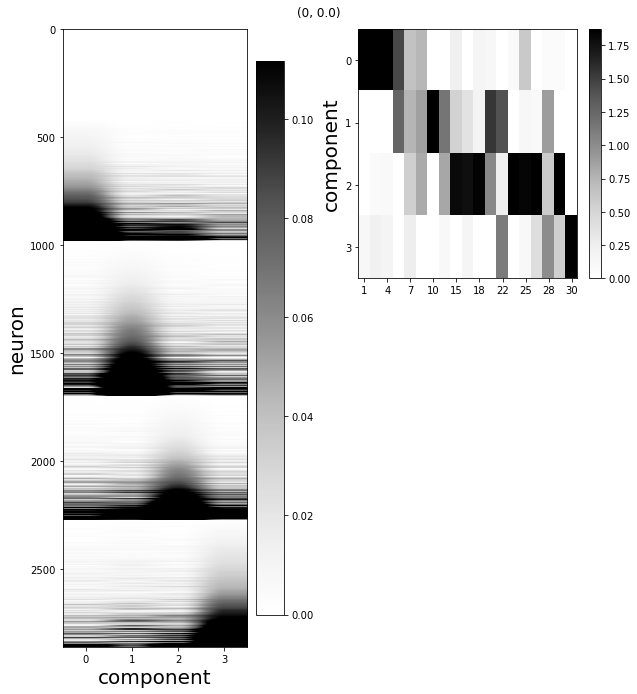

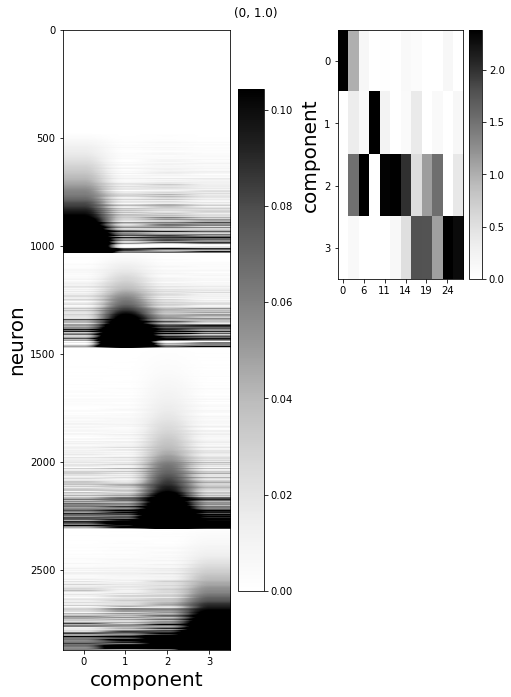

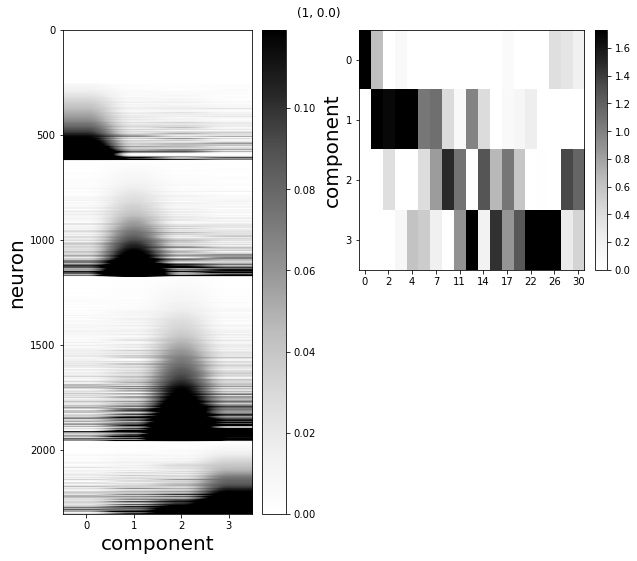

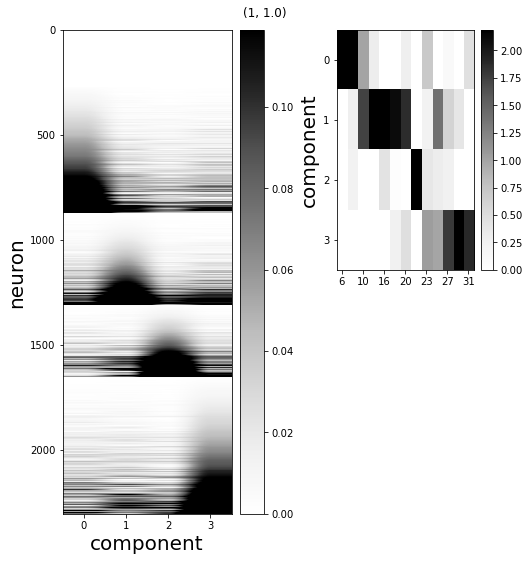

In [112]:
for key in W_sorted_d.keys():
    W_sorted = W_sorted_d[key]
    H_sorted = H_sorted_d[key]
    fig,ax=nmfp.plot_wh(W_sorted, H_sorted,factor_neuron_ratio=300,spacing=2,trial_ticklabels=H_sorted.columns)
    fig.suptitle(key)
    

In [73]:
ma=behavior['trials']['recordings']==3

In [76]:
behavior['trials']['visitedArm'][ma][29]

1

<AxesSubplot:xlabel='Time (s)'>

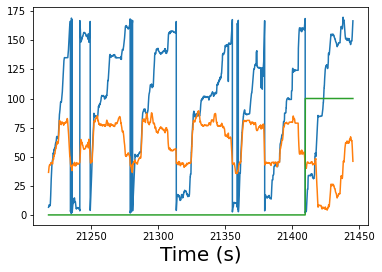

In [108]:
subdf=spk_beh_df.query('task_index==1 & (trial>=0 & trial<=6)')
subdf['lin'].plot()
subdf['y'].plot()
(subdf['visitedArm']*100).plot()

In [113]:
n_clust = 4
ct ='pyr'
task = 0
trial= 1
W = W_df_peaks_only_d[(task,trial)]
# W = W_df_peaks_only#W_d_d[ct][trial]
W_df_original = W_df_original_d[(task,trial)]
X_normed_restacked_df=X_normed_restacked_df_d[(task,trial)] 

res=KMeans(n_clust).fit(W)
clust = res.labels_
centroid = res.cluster_centers_
dist = res.transform(W)

dist_to_own_centroid = np.diag(dist[:,clust])

W_df = na.add_metrics_to_W(W, n_compo, pd_kwargs={})

W_df['clust'] = clust
W_df['factor'] = W_df.loc[:,0:n_compo-1].idxmax(axis=1)
W_df['inv_dist_to_centroid'] = -dist_to_own_centroid # for easiness of sorting; all features the higher the better

<AxesSubplot:>

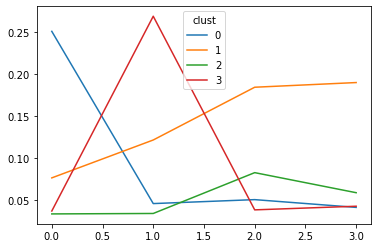

In [114]:
W_df.groupby('clust').mean().loc[:,0:n_compo-1].T.plot()

In [115]:
# sort_func = lambda x:na.hierarchical_sort(x,to_cut_keys=['sum'],to_cut_nbins=[4],final_sort_key=f'skew_{x.name}',ascending=False)
# sort_func = lambda x:na.hierarchical_sort(x,to_cut_keys=['sum'],to_cut_nbins=[2],final_sort_key=f'skew',ascending=False)

sort_func = lambda x:na.hierarchical_sort(x,to_cut_keys=[f'skew_{x.name}','skew'],to_cut_nbins=[4,4],final_sort_key=x.name,ascending=False)
# sort_func = lambda x:na.hierarchical_sort(x,to_cut_keys=[f'sum'],to_cut_nbins=[4,4],final_sort_key='inv_dist_to_centroid',ascending=False)

# W_df_sorted = W_df.groupby('clust').apply(sort_func)
W_df_sorted = W_df.groupby('factor').apply(sort_func)
# W_df_sorted = sort_func(W_df)


<AxesSubplot:ylabel='factor-None-lin_binned'>

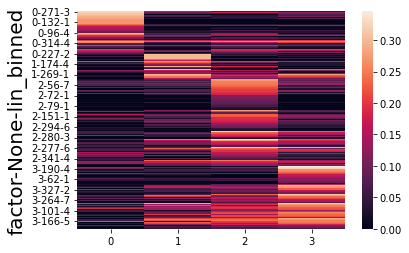

In [116]:
sns.heatmap(W_df_sorted.loc[:,0:n_compo-1])

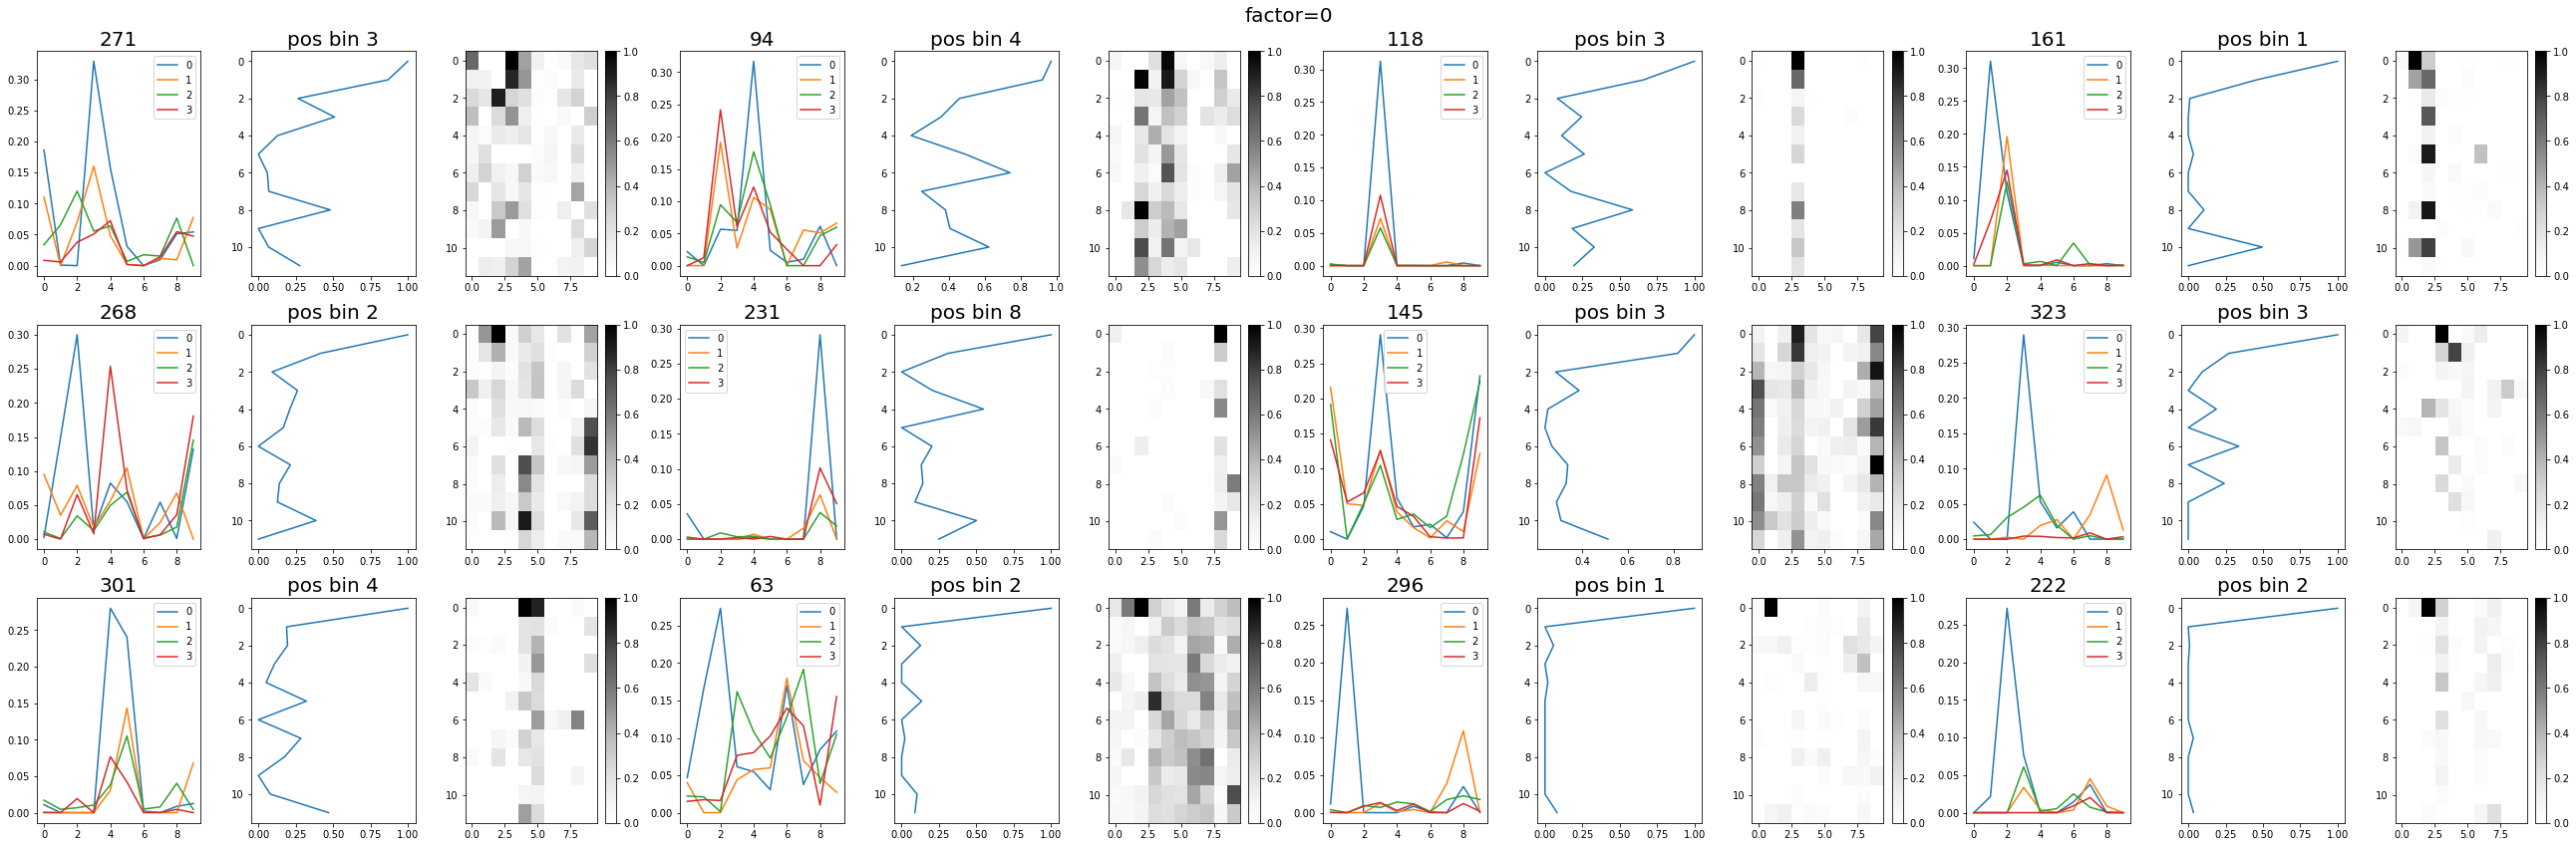

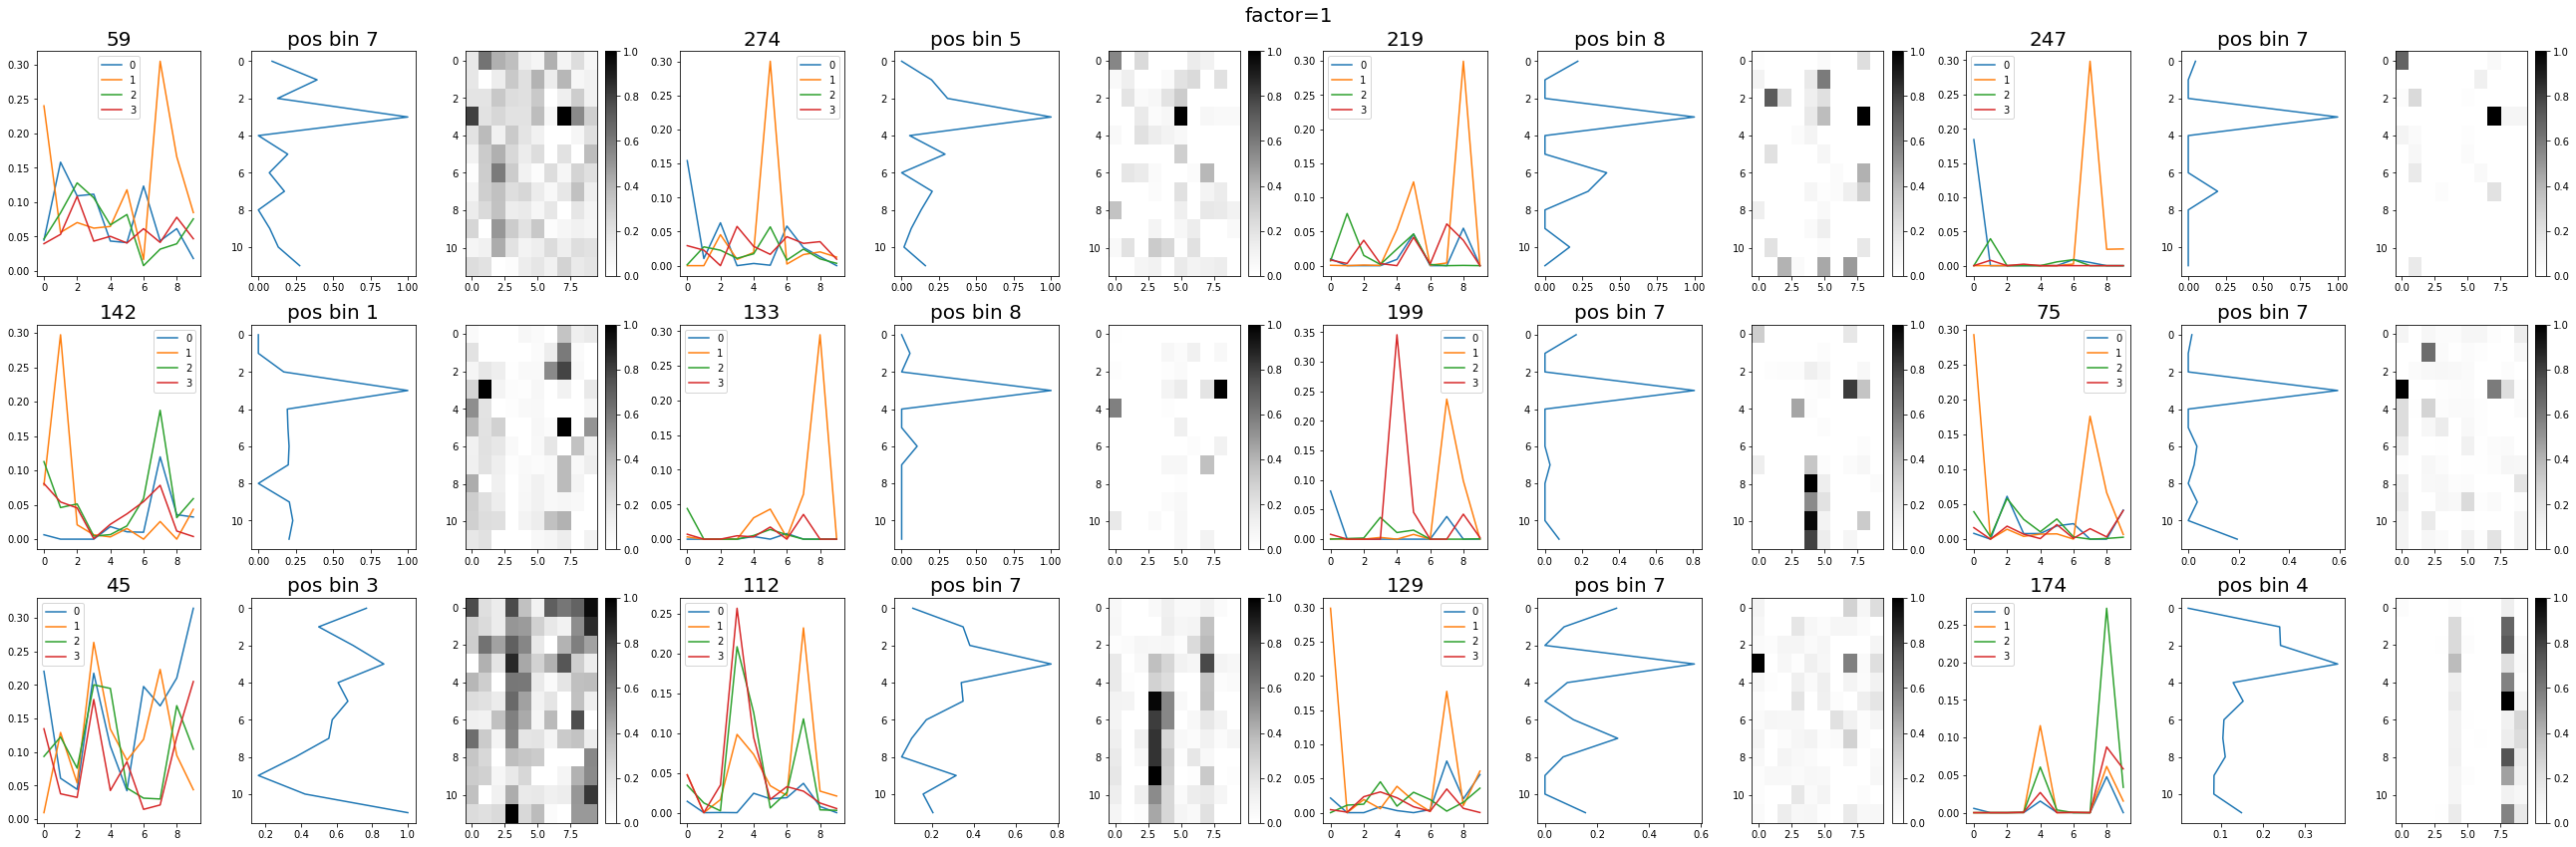

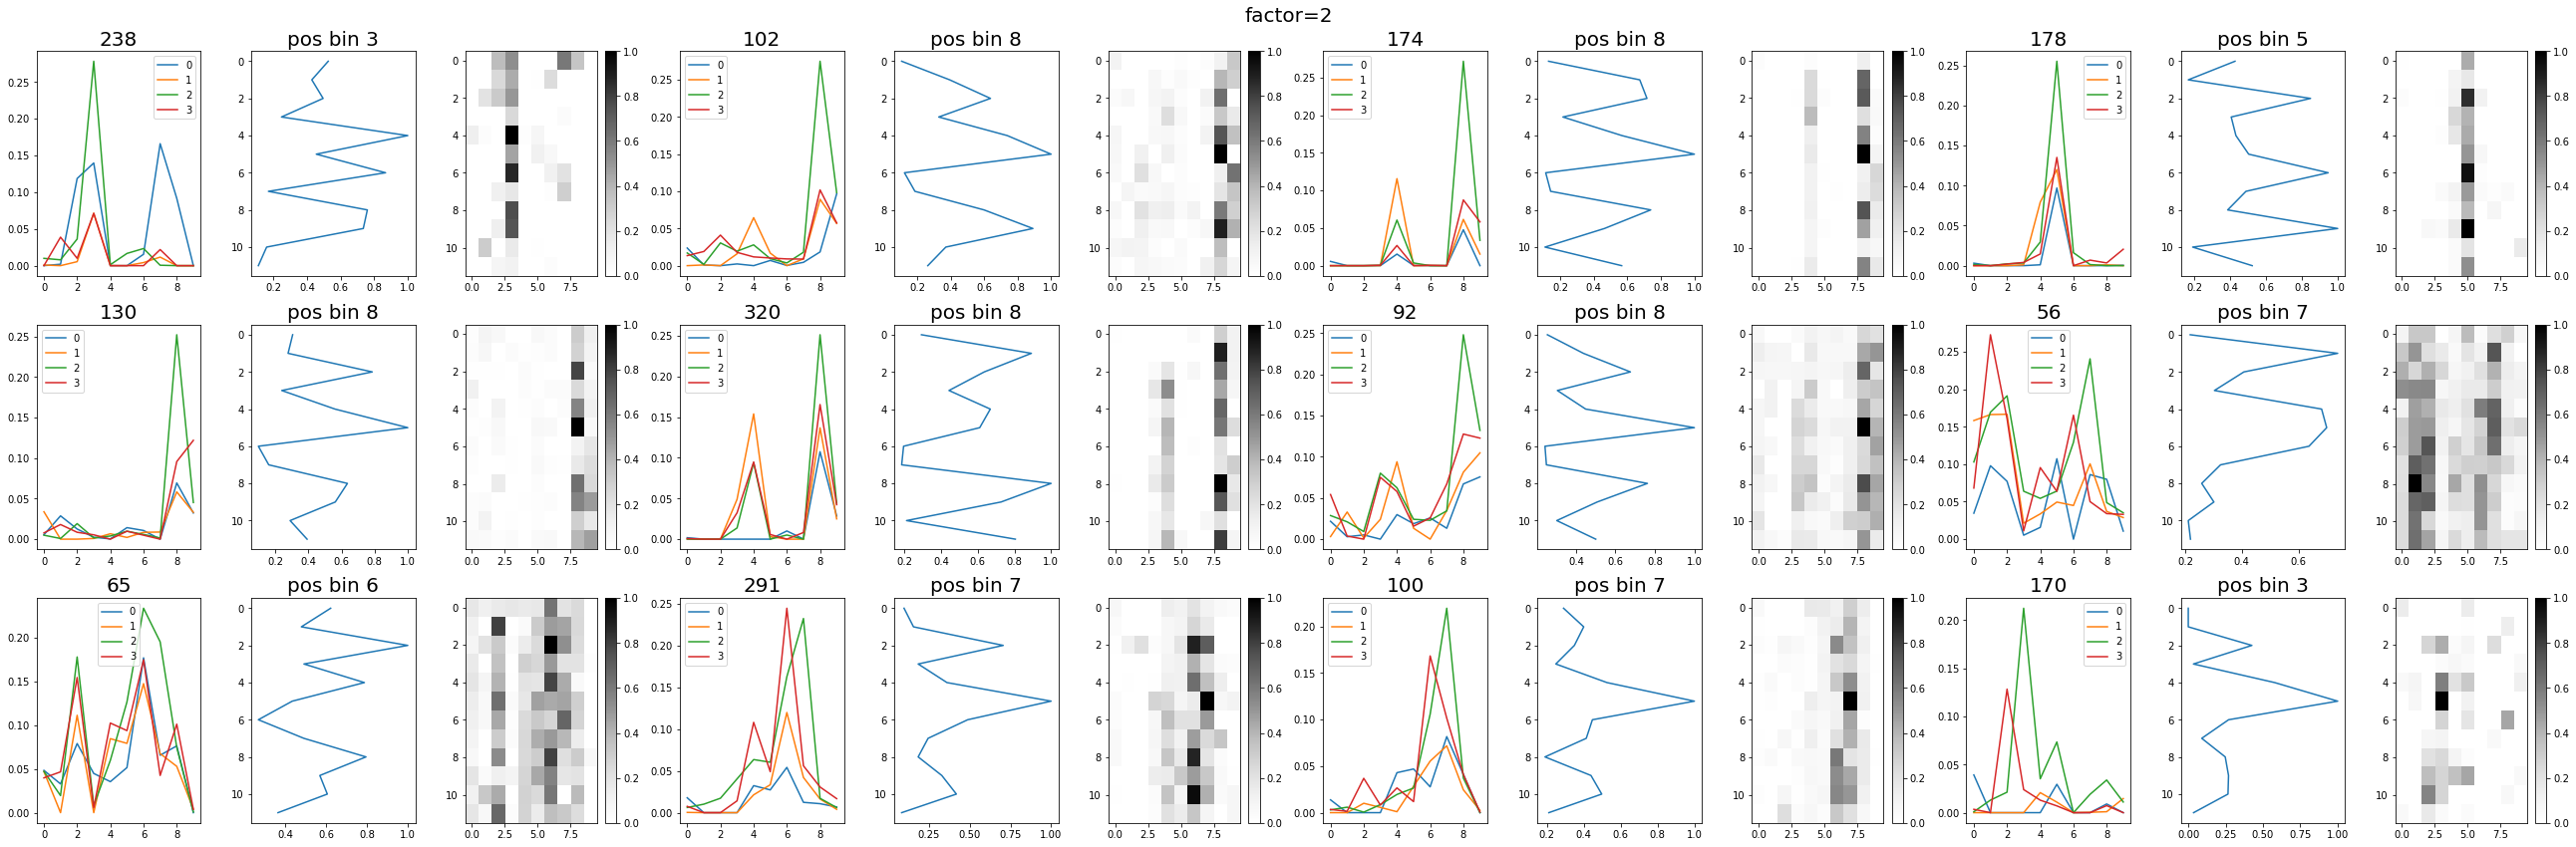

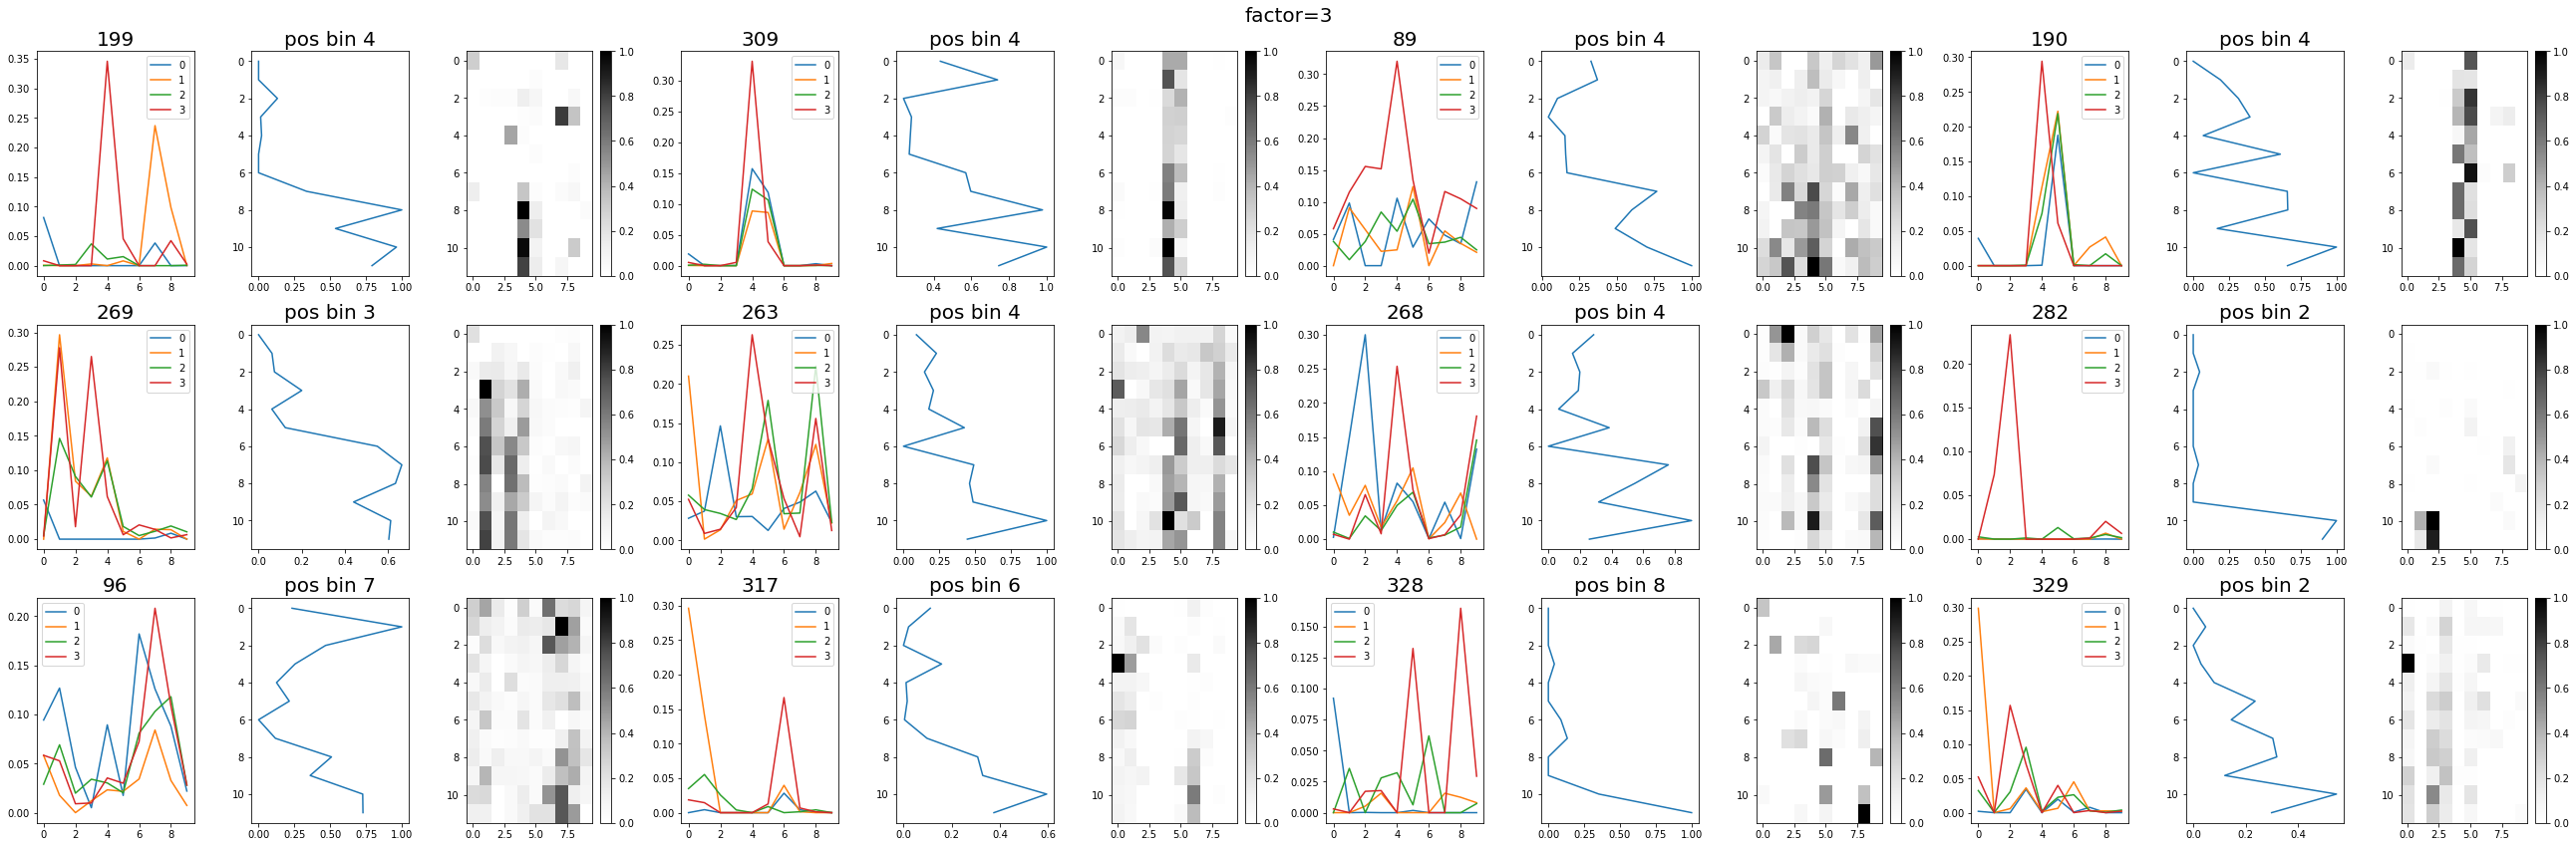

In [117]:
reload(nmfp)
clust_inds = W_df_sorted.index.get_level_values(level=0).unique()
clust_name = clust_inds.name
for clust in clust_inds:
    ii=0
    sample_inds = W_df_sorted.loc[clust].index[12*(ii):12*(ii+1)]
    fig,axs=nmfp.plot_example_W_and_ratemaps(W_df_original, sample_inds,X_normed_restacked_df,n_compo=n_compo)
    fig.suptitle(f'{clust_name}={clust}',fontsize=20)
    plt.tight_layout()



# quantify directional drift vs random fluctuations

In [120]:
import ruptures as rpt

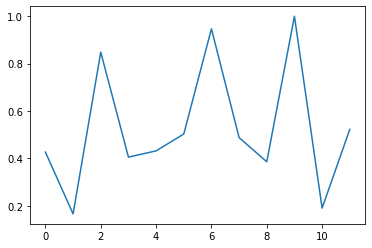

In [203]:
signal = X_normed_restacked_df.loc[178,5].values
plt.plot(signal)
# algo=rpt.Pelt(model='rbf').fit(signal)
algo = rpt.Dynp(model='l2',jump=1).fit(signal)
result = algo.predict(n_bkps=1)

# rpt.display(signal,bkps,result)

In [204]:
result

[2, 12]

In [225]:
algo.cost.error(0,100)

6.693049426674623

# cross condition similarity

In [545]:
ws_one=W_df_original_d[(0,0)].groupby(level=0).mean()
ws_two=W_df_original_d[(0,1)].groupby(level=0).mean()
inds=ws_one.index.intersection(ws_two.index)
n_neu=len(inds)
ws_one = ws_one.loc[inds]
ws_two = ws_two.loc[inds]

In [539]:
factor_similarity_each_neuron = scipy.stats.spearmanr(ws_one.T,ws_two.T)



In [563]:
inds[np.nonzero(np.diag(factor_similarity_each_neuron[1][0:n_neu,n_neu:n_neu*2]) < 0.05)[0]]

Int64Index([ 46,  91,  96, 100, 124, 133, 137, 143, 149, 165, 183, 187, 210,
            250, 254, 283, 284, 299, 312, 320, 322, 326, 336, 346, 347, 358],
           dtype='int64')

(<Figure size 648x288 with 4 Axes>,
 array([<AxesSubplot:title={'center':'91'}>,
        <AxesSubplot:title={'center':'pos bin 0'}>, <AxesSubplot:>],
       dtype=object))

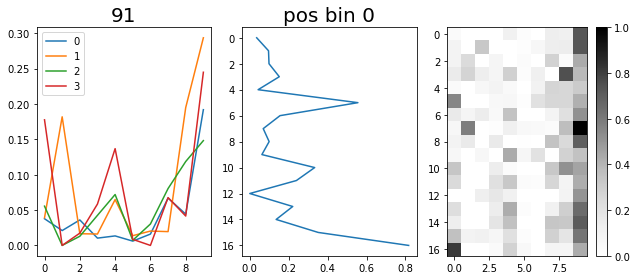

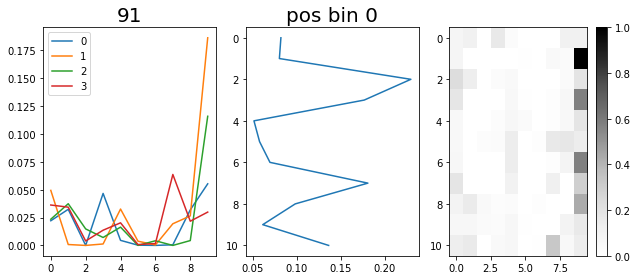

In [568]:
nmfp.plot_example_W_and_ratemaps(W_df_original_d[(0,0)], [(91,0)],X_normed_restacked_df_d[(0,0)],n_compo=n_compo)

nmfp.plot_example_W_and_ratemaps(W_df_original_d[(0,1)], [(91,0)],X_normed_restacked_df_d[(0,1)],n_compo=n_compo)